

# Hand Gesture Recognition for Human-Computer Interaction: Developing an Image and Video-Based Classification Model


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np
import keras.backend as K
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
from sklearn.datasets import make_multilabel_classification
# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

Using TensorFlow backend.


In [ ]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "../input/leapgestrecog/leapGestRecog"

## The Data

In [ ]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[4, 5, 7, ..., 4, 3, 4],
        [6, 6, 6, ..., 4, 4, 3],
        [5, 6, 6, ..., 5, 4, 4],
        ...,
        [6, 6, 6, ..., 5, 6, 4],
        [6, 5, 5, ..., 5, 6, 4],
        [4, 6, 6, ..., 5, 4, 5]], dtype=uint8),
 0]

In [ ]:
# shuffle the input data
import random
random.shuffle(image_data)

In [ ]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)
input_data[:5]

[array([[4, 3, 5, ..., 4, 4, 5],
        [5, 4, 5, ..., 2, 3, 3],
        [5, 4, 4, ..., 4, 3, 3],
        ...,
        [5, 4, 5, ..., 4, 3, 4],
        [4, 4, 5, ..., 3, 3, 4],
        [5, 5, 5, ..., 4, 3, 4]], dtype=uint8),
 array([[3, 5, 4, ..., 5, 5, 4],
        [5, 8, 7, ..., 6, 5, 5],
        [5, 6, 7, ..., 6, 6, 5],
        ...,
        [5, 5, 5, ..., 5, 6, 6],
        [4, 5, 5, ..., 6, 6, 5],
        [6, 6, 5, ..., 6, 5, 4]], dtype=uint8),
 array([[4, 3, 3, ..., 3, 3, 4],
        [4, 5, 4, ..., 3, 3, 4],
        [4, 5, 5, ..., 3, 3, 4],
        ...,
        [4, 4, 5, ..., 3, 4, 4],
        [5, 5, 4, ..., 4, 5, 4],
        [4, 4, 5, ..., 3, 4, 3]], dtype=uint8),
 array([[6, 6, 5, ..., 5, 5, 4],
        [5, 6, 6, ..., 5, 6, 6],
        [6, 7, 8, ..., 6, 6, 4],
        ...,
        [6, 6, 6, ..., 6, 7, 5],
        [5, 5, 6, ..., 6, 6, 5],
        [6, 6, 5, ..., 5, 5, 5]], dtype=uint8),
 array([[5, 5, 6, ..., 5, 5, 2],
        [5, 6, 5, ..., 5, 5, 4],
        [6, 6, 5, ..., 5, 5, 4

In [ ]:
label[:10]

[2, 6, 6, 6, 4, 6, 1, 1, 0, 9]

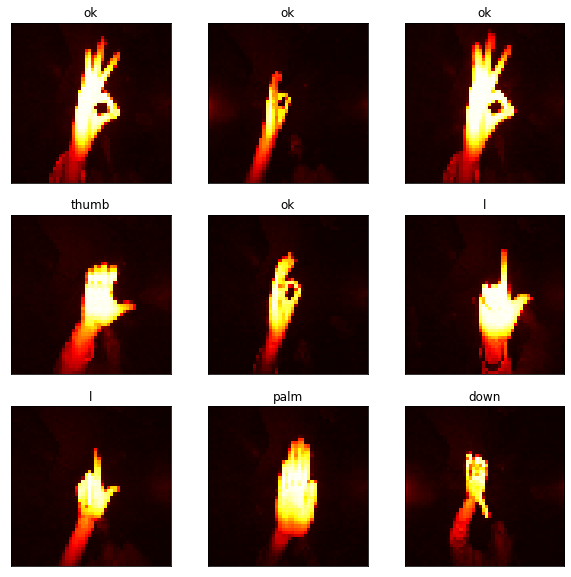

In [ ]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
#plt.show()

In [ ]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

# **Making multibalbel classifier**

In [ ]:
from sklearn.datasets import make_multilabel_classification
X,y=make_multilabel_classification(n_samples=500,n_features=4,n_classes=2,n_labels=3,random_state=1)
X

array([[ 9., 12.,  6., 12.],
       [ 5.,  2., 12., 22.],
       [15.,  5., 12., 11.],
       ...,
       [ 5., 10., 15., 28.],
       [ 0.,  8., 16., 27.],
       [ 6.,  9., 13., 22.]])

In [ ]:
y

array([[0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1,

<function matplotlib.pyplot.show(*args, **kw)>

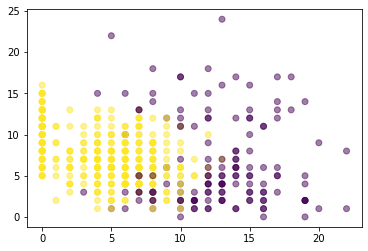

In [ ]:
rng=np.random.RandomState(1)
colors=rng.rand(1000)
plt.scatter(X[:,0:1],X[:,1:2],c=y[:,0],alpha=0.5,cmap='viridis')
plt.show

# **Normalise**

In [ ]:
X=(X-X.min())/(X.max()-X.min())
X

array([[0.20454545, 0.27272727, 0.13636364, 0.27272727],
       [0.11363636, 0.04545455, 0.27272727, 0.5       ],
       [0.34090909, 0.11363636, 0.27272727, 0.25      ],
       ...,
       [0.11363636, 0.22727273, 0.34090909, 0.63636364],
       [0.        , 0.18181818, 0.36363636, 0.61363636],
       [0.13636364, 0.20454545, 0.29545455, 0.5       ]])

In [ ]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [ ]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

# **Splitting the input_data to train and test data**

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.10, random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((18000, 50, 50, 1), (18000, 10), (2000, 50, 50, 1), (2000, 10))

## The Model

In [ ]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))

model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
         optimizer = 'rmsprop',
         metrics = ['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Train on 18000 samples, validate on 2000 samples
Epoch 1/7
18000/18000 [==============================] - 4s 199us/step - loss: 0.2513 - accuracy: 0.9186 - val_loss: 0.0047 - val_accuracy: 0.9990
Epoch 2/7
18000/18000 [==============================] - 3s 183us/step - loss: 0.0111 - accuracy: 0.9967 - val_loss: 0.0055 - val_accuracy: 0.9980
Epoch 3/7
18000/18000 [==============================] - 3s 185us/step - loss: 0.0150 - accuracy: 0.9974 - val_loss: 0.0068 - val_accuracy: 0.9995
Epoch 4/7
18000/18000 [==============================] - 3s 182us/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 1.2138e-04 - val_accuracy: 1.0000
Epoch 5/7
18000/18000 [==============================] - 3s 183us/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 1.4949e-04 - val_accuracy: 1.0000
Epoch 6/7
18000/18000 [==============================] - 3s 184us/step - loss: 0.0053 - accuracy: 0.9989 - val_loss: 0.0015 - val_accuracy: 0.9995
Epoch 7/7
18000/18000 [==============================] - 3s 1

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_4 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 64)       

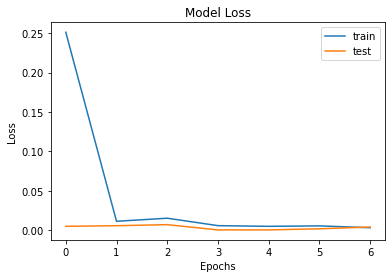

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

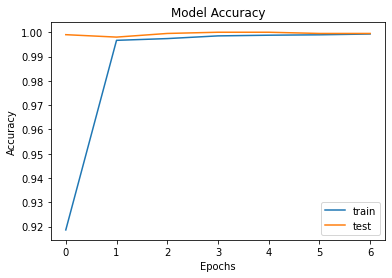

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# **Calculate loss and accuracy on test data**

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

2000/2000 [==============================] - 0s 86us/step
Test accuracy: 99.95%


## Confusion Matrix

In [ ]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sn
# cat = [c[3:] for c in CATEGORIES]
# plt.figure(figsize=(5,5))
# cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
# sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
# plt.plot()

# **Confusion Matrix**

[]

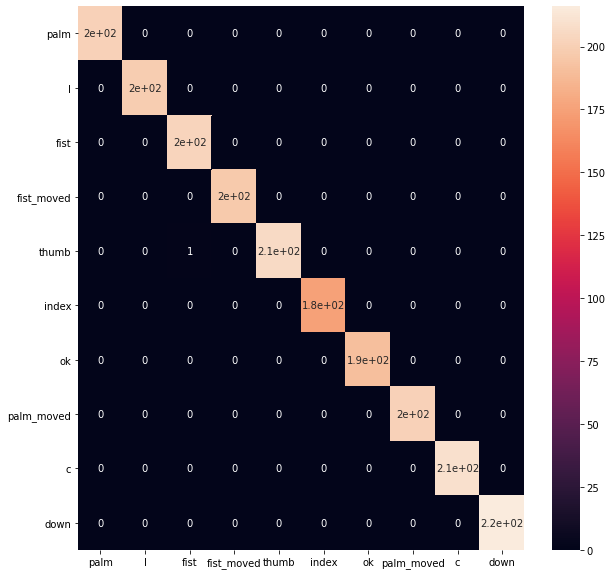

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cat = [c[3:] for c in CATEGORIES]
plt.figure(figsize=(10,10))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
plt.plot()

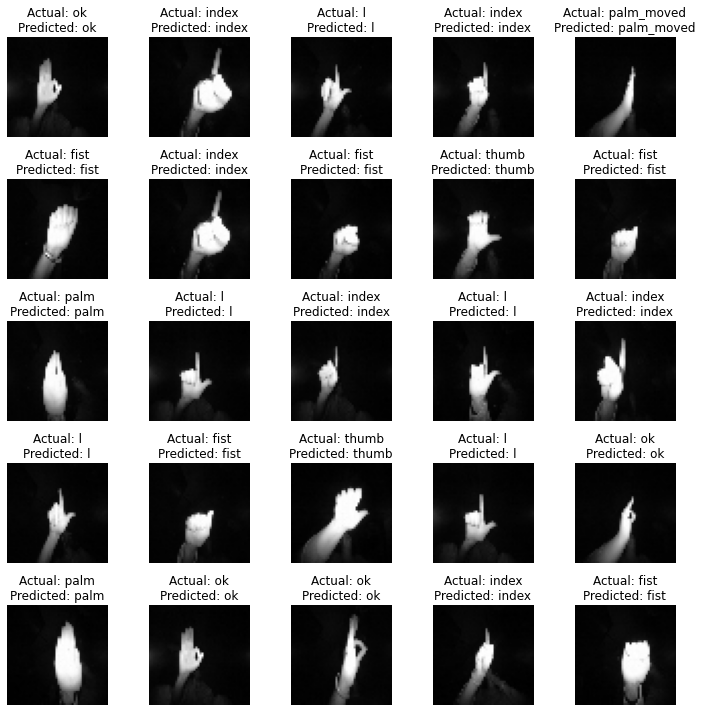

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Get indices of 25 random test images
indices = np.random.choice(X_test.shape[0], size=25, replace=False)

# Create figure and axes
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Iterate over the selected indices
for i, idx in enumerate(indices):
    # Get the actual and predicted labels
    actual = np.argmax(y_test[idx])
    predicted = np.argmax(y_pred[idx])

    # Get the corresponding image
    img = X_test[idx].squeeze()

    # Plot the image and labels
    ax = axes[i // 5, i % 5]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Actual: {CATEGORIES[actual][3:]}\nPredicted: {CATEGORIES[predicted][3:]}")
    ax.axis('off')

plt.tight_layout()
plt.show()